In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import os
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
#tokenization for wordcloud, ect..
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
imdb_df = pd.read_csv("Data/IMDB Dataset.csv")

In [12]:
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
sentiments = []#creates empty list

#Going to use VADER’s SentimentIntensityAnalyzer() to see how many 'Neutral (neu)' , 'Positive (pos)', and 'Negatvie(neg)'
# words there are for each article. 
for articles in imdb_df['review']: #goes through each artilce in bitcoin_news and applies polarity
    try:
        text = articles #accessing each articles 'content' which contains the article itself in 'bitcoin_news'
        results = analyzer.polarity_scores(text) #this is how get compound, pos, neg, and nue polarity scores
        #during imports we set analyzer equal to SentimentIntensityAnalyzer() 
        #'results' uses this function to find polarity score for each article in bitcoin_news
        compound = results["compound"] #gets compound polarity score
        pos = results["pos"] #gets postive polarity score
        neu = results["neu"] #gets neutral polarity score
        neg = results["neg"] #gets negative polarity score

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        }) #appends a dictionary inside the list-(sentiments) so a dataframe can be created
        #this appends all polarity score we got above
    except AttributeError:
        pass
#rinse and repeat for each article    
imdb = pd.DataFrame(sentiments) #creates a dataframe using the list of dicts
imdb.head()

In [16]:
imdb.tail(5)

,text,Compound,Positive,Negative,Neutral
49995,I thought this movie did a down right good job...,0.9890,0.199,0.047,0.753
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",-0.6693,0.114,0.166,0.720
49997,I am a Catholic taught in parochial elementary...,-0.9851,0.108,0.208,0.683
49998,I'm going to have to disagree with the previou...,-0.7648,0.082,0.105,0.813
49999,No one expects the Star Trek movies to be high...,0.4329,0.141,0.135,0.723


In [17]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english') # contains all stop words for english

In [18]:
# Expand the default stopwords list if necessary
#will append each word to the list 'stop' created in cell above.
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append('chars')
stop.append("''")
stop.append('’')
stop.append('arent')
stop.append('Mr.')
stop.append(',')
stop.append('br')

stop = set(stop)

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text) #tokenizes each word in text

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words)) #uses the stop list we created
    
    # Lemmatize Words into root words
    #makes Ran and Running into same word for exmaple. 
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [20]:
# Create a new tokens column for Bitcoin
imdb["tokens"] = imdb.text.apply(tokenizer)
imdb.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,One of the other reviewers has mentioned that ...,-0.9951,0.048,0.203,0.748,"[One, reviewer, mentioned, watching, 1, Oz, ep..."
1,A wonderful little production. <br /><br />The...,0.9641,0.172,0.053,0.776,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,0.9605,0.192,0.094,0.714,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,-0.9213,0.065,0.138,0.797,"[Basically, family, little, boy, Jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.9744,0.147,0.052,0.801,"[Petter, Mattei, Love, Time, Money, visually, ..."


# Wordclouds

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [52]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu', stopwords = stop).generate(text) #added stopswords = stop to filter
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

In [53]:
imdb_pos = imdb.loc[imdb['Compound'] > 0.0]
imdb_neg = imdb.loc[imdb['Compound'] < 0.0]



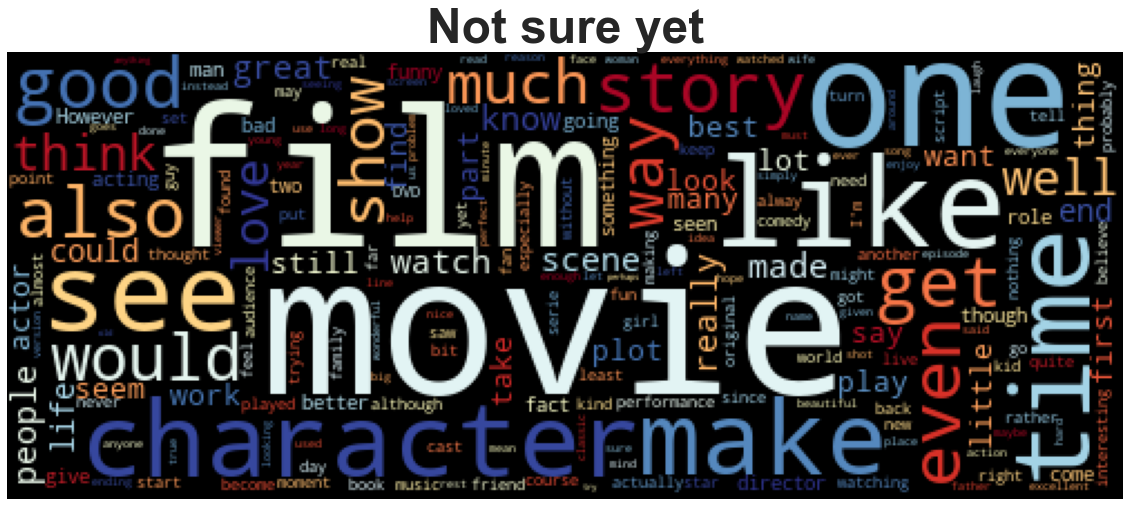

In [54]:
wordcloud(imdb_pos.text.str.cat(), title = 'postivie')

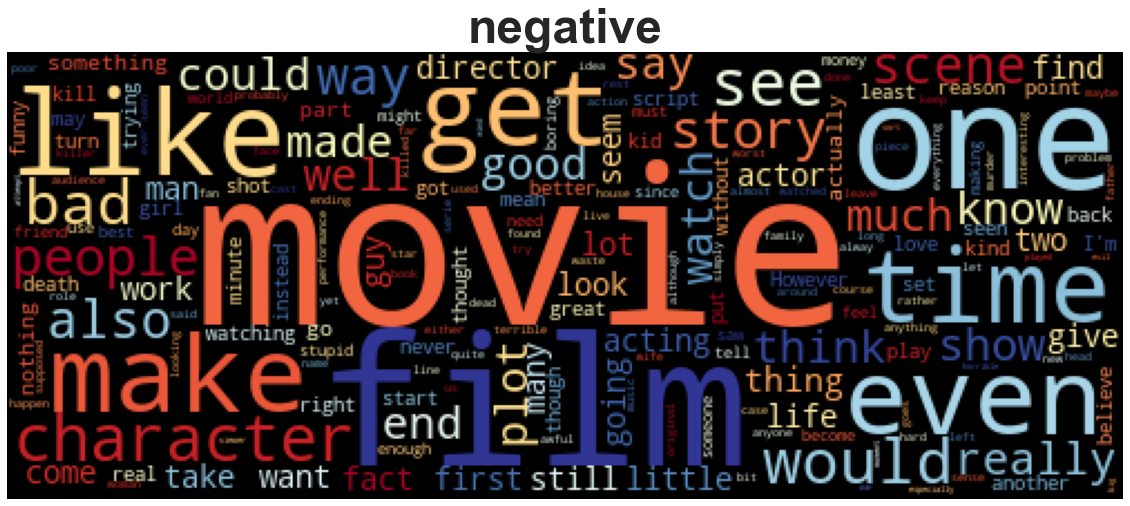

In [56]:
wordcloud(imdb_neg.text.str.cat(), title = 'negative')